In [208]:
import os
import pickle

import numpy as np
import numpy.typing as npt
import torch

from autoencoders import DenseAutoencoder as Autoencoder
from scm.box import BoxSCM

In [209]:
data_dir = "_data1"
latent_dim = 64

In [210]:
# Load data generation config
with open(
    os.path.join(data_dir, "generate_data_cfg.pkl"),
    "rb", pickle.HIGHEST_PROTOCOL
) as f:
    data = pickle.load(f)

num_balls: int = data["num_balls"]
n: int = data["n"]
degree: int = data["degree"]
box_size: int = data["box_size"]
intervention_order: npt.NDArray[np.int_] = data["intervention_order"]
n_samples: int = data["n_samples"]
width: int = data["width"]
height: int = data["height"]
ball_radius: int = data["ball_radius"]
# data_dir = data["data_dir"]  # DON'T!! we are supplying this
scm: BoxSCM = data["scm"]

# Ground truth graph
# Note the permutation by the intervention order
dag_gt = scm.adj_mat
dag_gt = dag_gt[intervention_order, :][:, intervention_order]

# Load z and x data
data = np.load(os.path.join(data_dir, "z_and_x.npz"))
zs_obs = data["zs_obs"]
xs_obs = data["xs_obs"]
zs_obs = torch.from_numpy(zs_obs).float()
xs_obs = torch.from_numpy(xs_obs).float().moveaxis(-1, -3) / 255.0
print(f"Loaded z and x data.")
print(f"{zs_obs.shape = }, {xs_obs.shape = }")

Loaded z and x data.
zs_obs.shape = torch.Size([10000, 6]), xs_obs.shape = torch.Size([10000, 3, 64, 64])


In [211]:
# Load the trained autoencoder
autoenc = Autoencoder(latent_dim)
autoenc.load_state_dict(torch.load(os.path.join(data_dir, f"autoenc_{latent_dim}.pth"), weights_only=True))
autoenc.requires_grad_(False)

encoder = autoenc.get_submodule("encoder").requires_grad_(False)
decoder = autoenc.get_submodule("decoder").requires_grad_(False)

In [212]:
# ### Part 2: Analysis

# ## Latent variables recovery
# # Mean correlation coefficient
# zhats_obs = encoder(xs_obs)
# assert isinstance(zhats_obs, Tensor)
# z_mcc = utils.mcc(zhats_obs.detach().cpu().numpy(), zs_obs.detach().cpu().numpy())
# print(f"{z_mcc = }")

See tensor(6256) for overlap

In [213]:
idx = torch.randint(0, zs_obs.shape[0], ())
idx

tensor(9257)

In [214]:
zhat_idx = encoder(xs_obs[idx:idx+1])[0]
xhat_idx = decoder(zhat_idx.unsqueeze(0))[0]

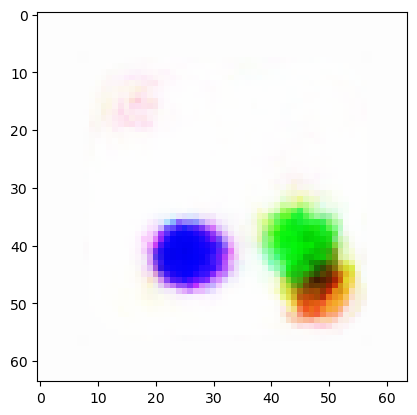

In [215]:
import matplotlib.pyplot as plt

plt.imshow(xhat_idx.detach().cpu().moveaxis(-3, -1).numpy())

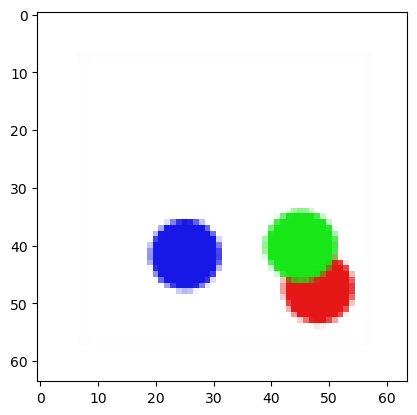

In [216]:
plt.imshow(xs_obs[idx].detach().cpu().moveaxis(-3, -1).numpy())